<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/Python_Machine_Learning_Tips_Extra_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Tips - Extremely Random Trees
https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

[Data Science Teacher Brandyn YouTube Channel](https://www.youtube.com/@data_science_teacher_brandyn)

[One on one time with Data Science Teacher Brandyn](https://www.datasimple.education/one-on-one-data-classes)


Follow Data Science Teacher Brandyn:

[On Facebook](https://www.facebook.com/datascienceteacherbrandyn/)

[On Linkedin](https://www.linkedin.com/company/87118408/?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base%3BbzacqELVQsWzYo4BJNigFw%3D%3D)

###[Ai Art Collections](https://www.datasimple.education/dataart/ai-art-collections)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/brandynewanek/data/main/Concrete_Compression.csv')
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# EDA

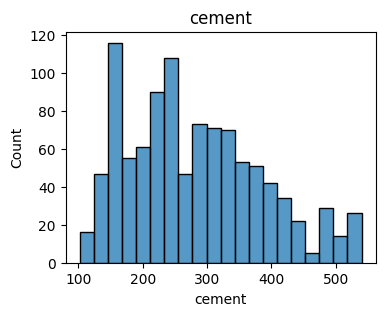

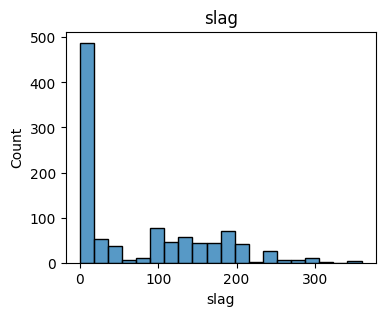

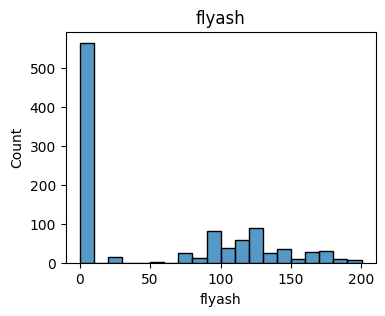

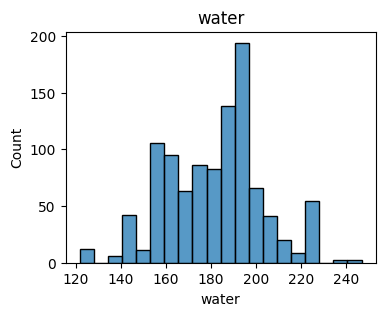

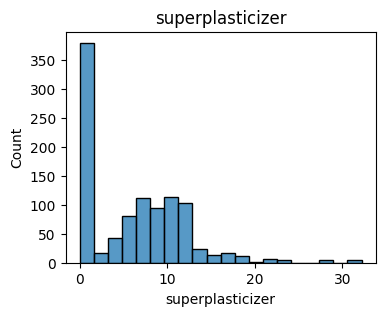

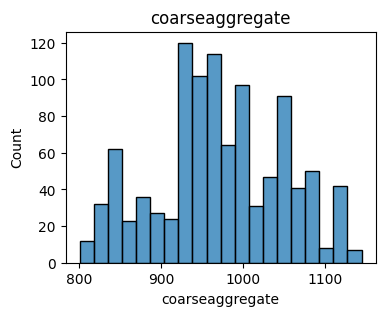

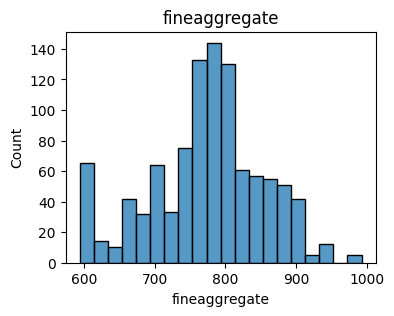

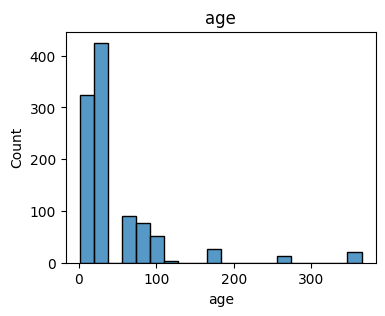

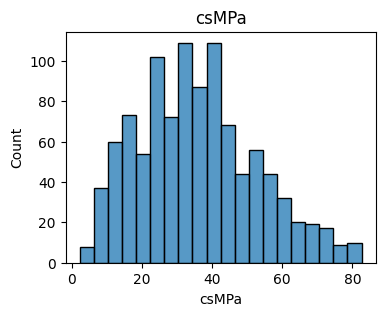

In [4]:
for feat in df.columns:
  plt.figure(figsize=(4,3))
  sns.histplot(data=df, x=feat, bins=20)
  plt.title(feat)
  plt.show()

# Preprocessing

## Null Values

In [5]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

## Bucketize

<Axes: ylabel='Frequency'>

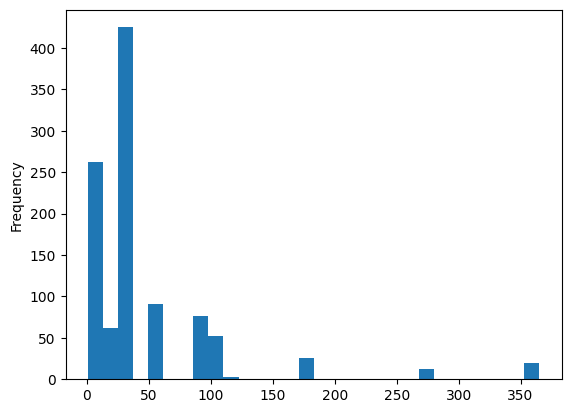

In [6]:
df['age'].plot.hist(bins=30)

In [7]:
df['age_bin'] = pd.cut(df['age'], bins=[-1, 75, 150, 250, 360], labels=['a', 'b', 'c', 'd'])

In [13]:
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,age_bin_a,age_bin_b,age_bin_c,age_bin_d,slag_0,flyash_0,superplasticizer_0
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,1,0,0,0,1,1,0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,1,0,0,0,1,1,0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0,0,0,1,0,1,1
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0,0,0,0,0,1,1
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,1,0,0,0,0,0,0
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,1,0,0,0,1,0,0
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,1,0,0,0,0,0,0
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,1,0,0,0,0,1,0


## One Hot Encoding

In [8]:
df = pd.get_dummies(df, columns=['age_bin'])

In [9]:
df['slag_0'] = (df['slag'] == 0 ) * 1
df['slag_0'].value_counts()

0    559
1    471
Name: slag_0, dtype: int64

In [10]:
df['flyash_0'] = (df['flyash'] == 0 ) * 1
df['flyash_0'].value_counts()

1    566
0    464
Name: flyash_0, dtype: int64

In [11]:
df['superplasticizer_0'] = (df['superplasticizer'] == 0 ) * 1
df['superplasticizer_0'].value_counts()

0    651
1    379
Name: superplasticizer_0, dtype: int64

# Modeling

## Train Test Split

In [14]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa', 'age_bin_a',
       'age_bin_b', 'age_bin_c', 'age_bin_d', 'slag_0', 'flyash_0',
       'superplasticizer_0'],
      dtype='object')

In [15]:
features = ['cement', 'slag', 'flyash',  'superplasticizer',
        'coarseaggregate', 'fineaggregate', 'age', 'csMPa', 'age_bin_a',
        'age_bin_b', 'age_bin_c', 'age_bin_d', 'slag_0', 'flyash_0',
        'superplasticizer_0']
target = ['water']

In [16]:
X = df[features]
y = df[target]

In [17]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=.3, random_state=42)

## standardize and PCA

In [18]:
scaler = StandardScaler().fit(X_tr)
X_tr = scaler.transform(X_tr)
X_ts = scaler.transform(X_ts)

In [19]:
pca = PCA().fit(X_tr)
X_tr = pca.transform(X_tr)
X_ts = pca.transform(X_ts)

## Random Forest vs Extremely Randomized Trees

In [20]:
rf = RandomForestRegressor().fit(X_tr, y_tr)
print(f'Train Score: {rf.score(X_tr, y_tr)}')
print(f'Test Score: {rf.score(X_ts, y_ts)}')

Train Score: 0.9793918129666521
Test Score: 0.8941042523528436


In [21]:
et = ExtraTreesRegressor().fit(X_tr,y_tr)
print(f'Train Score: {et.score(X_tr, y_tr)}')
print(f'Test Score: {et.score(X_ts, y_ts)}')

Train Score: 0.9999984408845223
Test Score: 0.9304131923569223


## What's Different about Random Forest

## Estimators

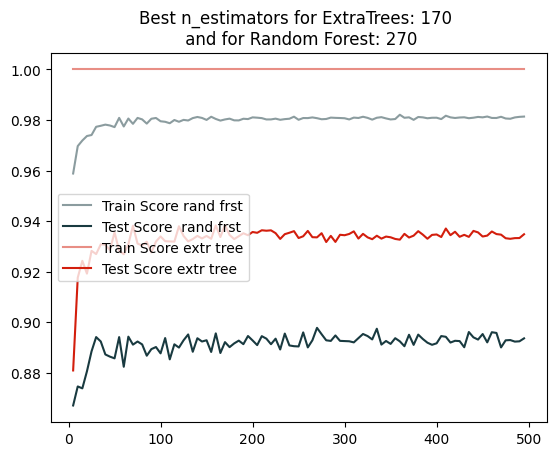

In [22]:
n_estimators = np.arange(5,500,5)

train_scores_rf = []
test_scores_rf = []
train_scores_et = []
test_scores_et = []

for e in n_estimators:
  rf = RandomForestRegressor(n_estimators=e).fit(X_tr, y_tr)
  train_scores_rf.append(rf.score(X_tr, y_tr))
  test_scores_rf.append(rf.score(X_ts, y_ts))

  et = ExtraTreesRegressor(n_estimators=e).fit(X_tr,y_tr)
  train_scores_et.append(et.score(X_tr, y_tr))
  test_scores_et.append(et.score(X_ts, y_ts))

sns.lineplot(x=n_estimators, y=train_scores_rf, label='Train Score rand frst', color='#193A40', alpha=.5)
sns.lineplot(x=n_estimators, y=test_scores_rf, label='Test Score  rand frst', color='#193A40')

sns.lineplot(x=n_estimators, y=train_scores_et, label='Train Score extr tree', color='#D31E0D', alpha=.5)
sns.lineplot(x=n_estimators, y=test_scores_et, label='Test Score extr tree', color='#D31E0D')

best_trees = n_estimators[np.argmax(test_scores_et)]
best_randforest = n_estimators[np.argmax(test_scores_rf)]

plt.title(f'Best n_estimators for ExtraTrees: {best_trees} \n and for Random Forest: {best_randforest}')
plt.legend()
plt.show()

## max_depth

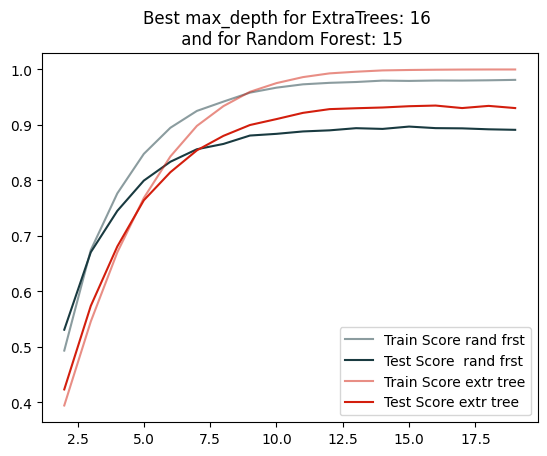

In [28]:
max_depths = np.arange(2,20)

train_scores_rf = []
test_scores_rf = []
train_scores_et = []
test_scores_et = []

for m in max_depths:
  rf = RandomForestRegressor(n_estimators=270, max_depth=m).fit(X_tr, y_tr)
  train_scores_rf.append(rf.score(X_tr, y_tr))
  test_scores_rf.append(rf.score(X_ts, y_ts))

  et = ExtraTreesRegressor(n_estimators=170, max_depth=m).fit(X_tr,y_tr)
  train_scores_et.append(et.score(X_tr, y_tr))
  test_scores_et.append(et.score(X_ts, y_ts))

sns.lineplot(x=max_depths, y=train_scores_rf, label='Train Score rand frst', color='#193A40', alpha=.5)
sns.lineplot(x=max_depths, y=test_scores_rf, label='Test Score  rand frst', color='#193A40')

sns.lineplot(x=max_depths, y=train_scores_et, label='Train Score extr tree', color='#D31E0D', alpha=.5)
sns.lineplot(x=max_depths, y=test_scores_et, label='Test Score extr tree', color='#D31E0D')

best_trees = max_depths[np.argmax(test_scores_et)]
best_randforest = max_depths[np.argmax(test_scores_rf)]

plt.title(f'Best max_depth for ExtraTrees: {best_trees} \n and for Random Forest: {best_randforest}')
plt.legend()
plt.show()

##  max_features

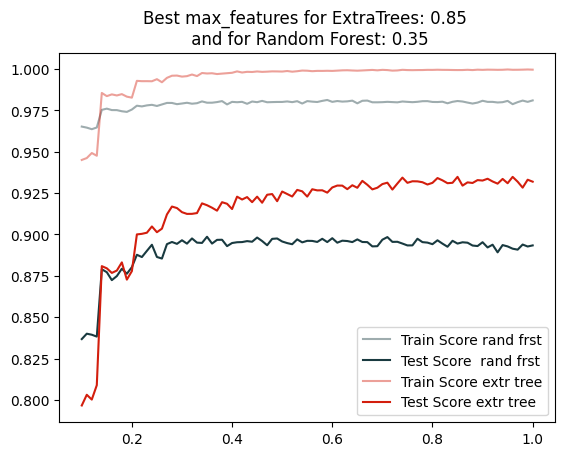

In [29]:
max_features = np.arange(.1,1.01,.01)

train_scores_rf = []
test_scores_rf = []
train_scores_et = []
test_scores_et = []

for m in max_features:
  rf = RandomForestRegressor(n_estimators=270, max_depth=15, max_features=m).fit(X_tr, y_tr)
  train_scores_rf.append(rf.score(X_tr, y_tr))
  test_scores_rf.append(rf.score(X_ts, y_ts))

  et = ExtraTreesRegressor(n_estimators=170, max_depth=16, max_features=m).fit(X_tr,y_tr)
  train_scores_et.append(et.score(X_tr, y_tr))
  test_scores_et.append(et.score(X_ts, y_ts))

sns.lineplot(x=max_features, y=train_scores_rf, label='Train Score rand frst', color='#193A40', alpha=.42)
sns.lineplot(x=max_features, y=test_scores_rf, label='Test Score  rand frst', color='#193A40')

sns.lineplot(x=max_features, y=train_scores_et, label='Train Score extr tree', color='#D31E0D', alpha=.42)
sns.lineplot(x=max_features, y=test_scores_et, label='Test Score extr tree', color='#D31E0D')

best_trees = np.round(max_features[np.argmax(test_scores_et)],2)
best_randforest = np.round(max_features[np.argmax(test_scores_rf)],2)

plt.title(f'Best max_features for ExtraTrees: {best_trees} \n and for Random Forest: {best_randforest}')
plt.legend()
plt.show()

## Bootstrap

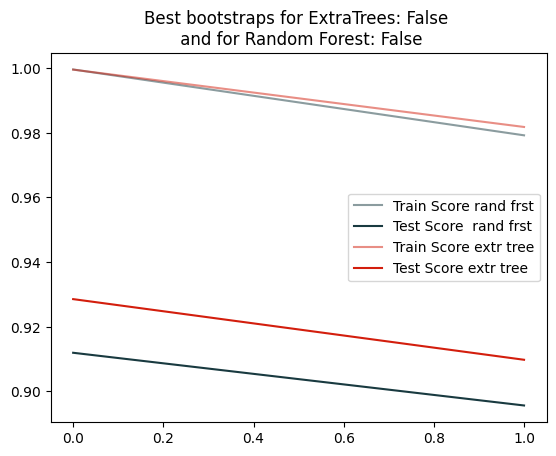

In [30]:
bootstraps = [True, False]

train_scores_rf = []
test_scores_rf = []
train_scores_et = []
test_scores_et = []

for b in bootstraps:
  rf = RandomForestRegressor(n_estimators=270, max_depth=15, max_features=.35, bootstrap=b).fit(X_tr, y_tr)
  train_scores_rf.append(rf.score(X_tr, y_tr))
  test_scores_rf.append(rf.score(X_ts, y_ts))

  et = ExtraTreesRegressor(n_estimators=170, max_depth=16, max_features=.85, bootstrap=b).fit(X_tr,y_tr)
  train_scores_et.append(et.score(X_tr, y_tr))
  test_scores_et.append(et.score(X_ts, y_ts))

sns.lineplot(x=bootstraps, y=train_scores_rf, label='Train Score rand frst', color='#193A40', alpha=.5)
sns.lineplot(x=bootstraps, y=test_scores_rf, label='Test Score  rand frst', color='#193A40')

sns.lineplot(x=bootstraps, y=train_scores_et, label='Train Score extr tree', color='#D31E0D', alpha=.5)
sns.lineplot(x=bootstraps, y=test_scores_et, label='Test Score extr tree', color='#D31E0D')

best_trees = bootstraps[np.argmax(test_scores_et)]
best_randforest = bootstraps[np.argmax(test_scores_rf)]

plt.title(f'Best bootstraps for ExtraTrees: {best_trees} \n and for Random Forest: {best_randforest}')
plt.legend()
plt.show()

In [39]:
rf = RandomForestRegressor(n_estimators=270, max_depth=15, max_features=.35, bootstrap=False).fit(X_tr, y_tr)
print(f'Train Score: {rf.score(X_tr, y_tr)}')
print(f'Test Score: {rf.score(X_ts, y_ts)}')

Train Score: 0.9994598775427428
Test Score: 0.9116432177871305


In [37]:
et = ExtraTreesRegressor(n_estimators=170, max_depth=16, max_features=.85, bootstrap=False).fit(X_tr,y_tr)
print(f'Train Score: {et.score(X_tr, y_tr)}')
print(f'Test Score: {et.score(X_ts, y_ts)}')

Train Score: 0.9995033801950803
Test Score: 0.9306316505002745


In [55]:
y_tr

,water
196,165.6
631,184.0
81,155.7
526,154.0
830,179.0
...,...
87,144.7
330,143.3
466,166.6
121,181.1


In [82]:
from sklearn.neural_network import MLPRegressor
clf_lb = MLPRegressor(solver='lbfgs', alpha=1e-5,activation='relu', hidden_layer_sizes=(500,400,), random_state=123).fit(X_tr,y_tr)
print(f'Train Score: {clf_lb.score(X_tr, y_tr)}')
print(f'Test Score: {clf_lb.score(X_ts, y_ts)}')


Train Score: 0.9880988576928168
Test Score: 0.9347034788299288


In [83]:
from sklearn.ensemble import VotingRegressor
evc=VotingRegressor(estimators=[('rf',rf),('et',et),('MLP',clf_lb)])
evc.fit(X_tr,y_tr)
print(f'Train Score: {evc.score(X_tr, y_tr)}')
print(f'Test Score: {evc.score(X_ts, y_ts)}')

Train Score: 0.9979482467906654
Test Score: 0.943900669768205
